# 🍷 Wine Quality Classification

In [4]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print('Libraries imported successfully!')

Libraries imported successfully!


In [5]:
#Load Dataset & Exploratory Data Analysis
df = pd.read_csv('/content/WineQT.csv')
df = df.drop('Id', axis=1, errors='ignore')

print('Shape:', df.shape)
print('\nFirst 5 rows:')
print(df.head())
print('\nDataset Info:')
df.info()
print('\nStatistical Summary:')
print(df.describe())
print('\nQuality Score Distribution:')
print(df['quality'].value_counts().sort_index())

Shape: (1143, 12)

First 5 rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.

In [6]:
#Check Missing Values & Duplicates
print('Missing Values:')
print(df.isnull().sum())

print('\nDuplicate Rows:', df.duplicated().sum())
df = df.drop_duplicates()
print('Shape after removing duplicates:', df.shape)

Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Duplicate Rows: 125
Shape after removing duplicates: (1018, 12)


Class Distribution:
quality_label
Medium    842
High      137
Low        39
Name: count, dtype: int64


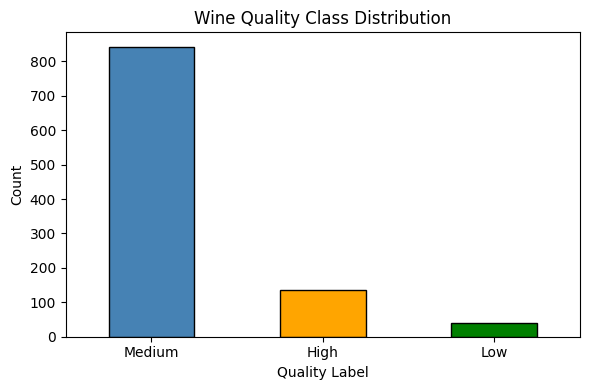

In [7]:
#Quality Label Encoding (Low / Medium / High)
def quality_label(q):
    if q <= 4:
        return 'Low'
    elif q <= 6:
        return 'Medium'
    else:
        return 'High'

df['quality_label'] = df['quality'].apply(quality_label)

print('Class Distribution:')
print(df['quality_label'].value_counts())

# Visualize class distribution
plt.figure(figsize=(6, 4))
df['quality_label'].value_counts().plot(kind='bar', color=['steelblue','orange','green'], edgecolor='black')
plt.title('Wine Quality Class Distribution')
plt.xlabel('Quality Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
#Feature & Target Split + Train-Test Split (with stratify)
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# stratify=y ensures class balance is preserved in both splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('Training samples:', X_train.shape[0])
print('Testing samples :', X_test.shape[0])
print('\nClass distribution in training set:')
print(y_train.value_counts())
print('\nClass distribution in test set:')
print(y_test.value_counts())

Training samples: 814
Testing samples : 204

Class distribution in training set:
quality_label
Medium    673
High      110
Low        31
Name: count, dtype: int64

Class distribution in test set:
quality_label
Medium    169
High       27
Low         8
Name: count, dtype: int64


In [9]:
#Feature Scaling (Required for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print('Features scaled using StandardScaler.')
print('Mean of training features (should be ~0):', X_train_scaled.mean(axis=0).round(3))

Features scaled using StandardScaler.
Mean of training features (should be ~0): [-0.  0.  0.  0.  0. -0.  0. -0.  0. -0.  0.]


In [10]:
#Model 1 - Logistic Regression
lr_model = LogisticRegression(max_iter=5000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

print('===== Logistic Regression =====')
print('Accuracy:', round(accuracy_score(y_test, y_pred_lr) * 100, 2), '%')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_lr))

===== Logistic Regression =====
Accuracy: 84.8 %

Classification Report:
              precision    recall  f1-score   support

        High       0.62      0.37      0.47        27
         Low       0.00      0.00      0.00         8
      Medium       0.87      0.96      0.91       169

    accuracy                           0.85       204
   macro avg       0.50      0.44      0.46       204
weighted avg       0.80      0.85      0.82       204



In [11]:
# Model 2 - Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Tree-based models don't need scaling

y_pred_rf = rf_model.predict(X_test)

print('===== Random Forest Classifier =====')
print('Accuracy:', round(accuracy_score(y_test, y_pred_rf) * 100, 2), '%')
print('\nClassification Report:')
print(classification_report(y_test, y_pred_rf))

===== Random Forest Classifier =====
Accuracy: 85.78 %

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.44      0.53        27
         Low       0.00      0.00      0.00         8
      Medium       0.88      0.96      0.92       169

    accuracy                           0.86       204
   macro avg       0.51      0.47      0.48       204
weighted avg       0.81      0.86      0.83       204



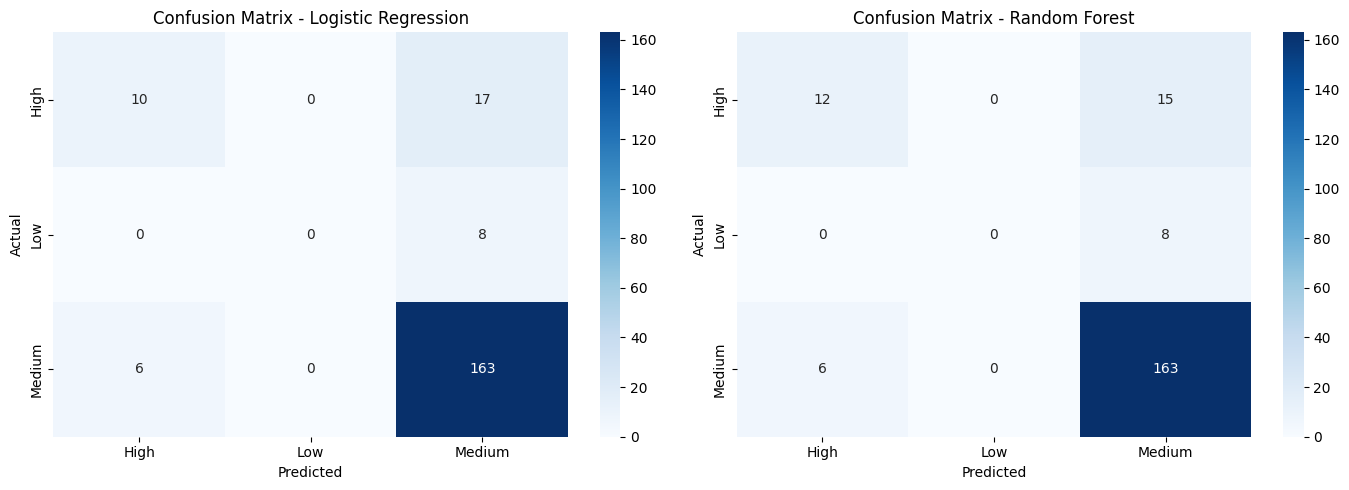

In [12]:
#Confusion Matrix - Both Models Side by Side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
labels = ['High', 'Low', 'Medium']

for ax, y_pred, title in zip(
    axes,
    [y_pred_lr, y_pred_rf],
    ['Logistic Regression', 'Random Forest']
):
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

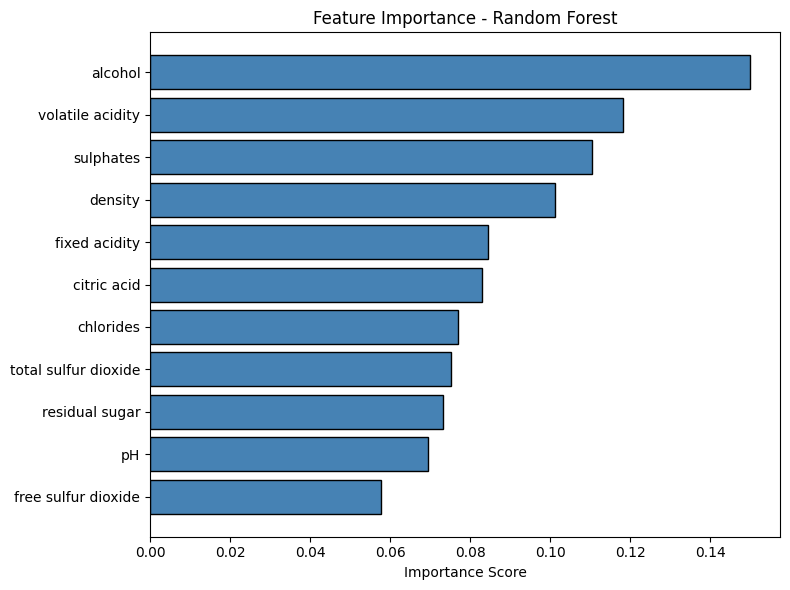

In [13]:
#Feature Importance - Random Forest
feature_names = X.columns
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values('Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='steelblue', edgecolor='black')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

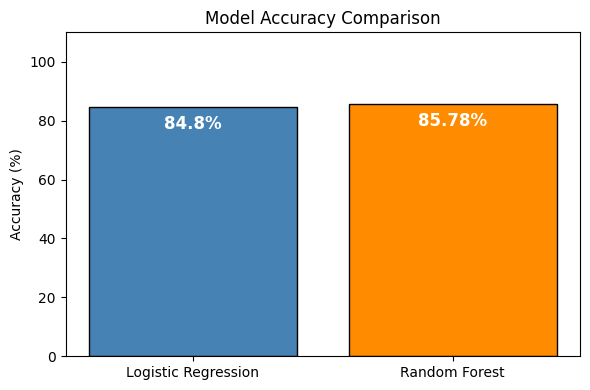

Best Model: Random Forest with 85.78% accuracy


In [14]:
#Model Accuracy Comparison
models = ['Logistic Regression', 'Random Forest']
accuracies = [
    round(accuracy_score(y_test, y_pred_lr) * 100, 2),
    round(accuracy_score(y_test, y_pred_rf) * 100, 2)
]

plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=['steelblue', 'darkorange'], edgecolor='black')
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 3,
             f'{acc}%', ha='center', va='top', fontsize=12, color='white', fontweight='bold')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 110)
plt.tight_layout()
plt.show()

best = models[accuracies.index(max(accuracies))]
print(f'Best Model: {best} with {max(accuracies)}% accuracy')

In [15]:
# Export Model and Scaler for the Web App
import joblib

# Re-train Random Forest on the SCALED data just to make the web app pipeline simpler
rf_model_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_final.fit(X_train_scaled, y_train)

# Save the scaler and the final model
joblib.dump(scaler, 'wine_scaler.pkl')
joblib.dump(rf_model_final, 'wine_model.pkl')

print("Success! 'wine_scaler.pkl' and 'wine_model.pkl' saved for the Streamlit UI.")

Success! 'wine_scaler.pkl' and 'wine_model.pkl' saved for the Streamlit UI.
